### Part I: Research Question

#### A. Describe the purpose of this data analysis by doing the following:

**1. Summarize one research question that is relevant to a real-world organizational situation captured in the selected data set and that you will answer using time series modeling techniques.**

The research question for this perfromance assessment will be: With two years of hospital revenue data, are we able to create a predictive model to forecast revenue values?

**2. Define the objectives or goals of the data analysis. Ensure your objectives or goals are reasonable within the scope of the scenario and are represented in the available data.**

The goal of this analysis is to identify significant patterns in revenue that can help us predict hospital revenue. We will   analyze the revenue data for the hospital and look for any trends, seasonality, or other patterns present in the data. Additionally, we will be using the ARIMA model to predict revenue.

### Part II: Method Justification

**B. Summarize the assumptions of a time series model including stationarity and autocorrelated data.**

The time series model assumes the following:

1. **Stationary:** The time series data should be stationary. Stationary refers to the data being normally distributed, the mean being constant over the period of time, and the variance to be consistant over a period of time. Additionally, the series should not have any trends and the autocorrelations should be constant as well.

2. **Random Distribution and Constant:** The data and the error is randomly distributed, additionally, the error is assumed to be uncorrelated as well. In addition to the random distibution, we are expecting the mean and the variance to be constant.

3. **No Outliers:** There should be no outliers in the series (Statistics Solutions, 2021).

4. **No Autocorrelation:** The residuals are not autocorrelated. Autocorrelation is the degree of similarity between the time series and the lagged version over time intervals. For this anaylsis, we want to ensure that there is no autocorrelation in the data.


### Part III: Data Preparation

**C. Summarize the data cleaning process by doing the following:**

**1. Provide a line graph visualizing the realization of the time series.**

Please see the code below for the realization of the time series line graph:

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from statsmodels.tsa.stattools import adfuller         

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from scipy import signal
import statsmodels.api as sm

from statsmodels.tsa.arima.model import ARIMA


In [2]:
df = pd.read_csv(r"C:\Users\shabn\Documents\WGU - MSDA\D213\medical_time_series .csv")

In [3]:
df.head()

,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888


In [4]:
# check for nulls in the data
display(df.isnull().any())

Day        False
Revenue    False
dtype: bool

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool

In [6]:
# check for any duplicate values in the data
display(df.duplicated().any())

False

In [7]:
# Generate a date range starting from '2019-01-01' with a frequency of 24 hours
df['Date'] = pd.date_range(start=datetime(2020, 1, 1), periods=df.shape[0], freq='24H')

# Set the Date as an index
df.set_index('Date', inplace=True)

# Print the DataFrame
print(df)

            Day    Revenue
Date                      
2020-01-01    1   0.000000
2020-01-02    2  -0.292356
2020-01-03    3  -0.327772
2020-01-04    4  -0.339987
2020-01-05    5  -0.124888
...         ...        ...
2021-12-27  727  15.722056
2021-12-28  728  15.865822
2021-12-29  729  15.708988
2021-12-30  730  15.822867
2021-12-31  731  16.069429

[731 rows x 2 columns]


In [8]:
# we now know that there are no nulls and that the values are unique

# we will now index the date column since we are using day format

X=df.Day
y=df.Revenue

In [9]:
# add index
df.set_index('Day', inplace=True)

In [10]:
# check datatype of index
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            722, 723, 724, 725, 726, 727, 728, 729, 730, 731],
           dtype='int64', name='Day', length=731)

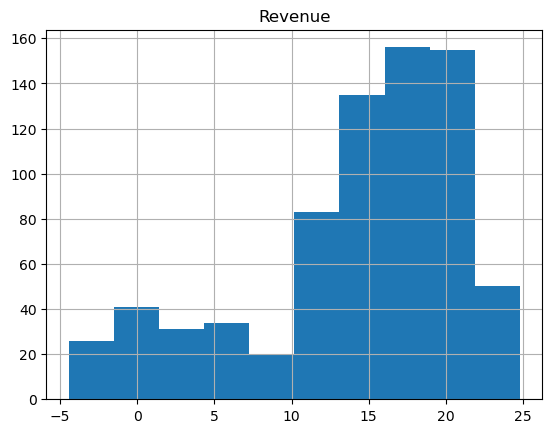

In [11]:
df.hist()
plt.show()

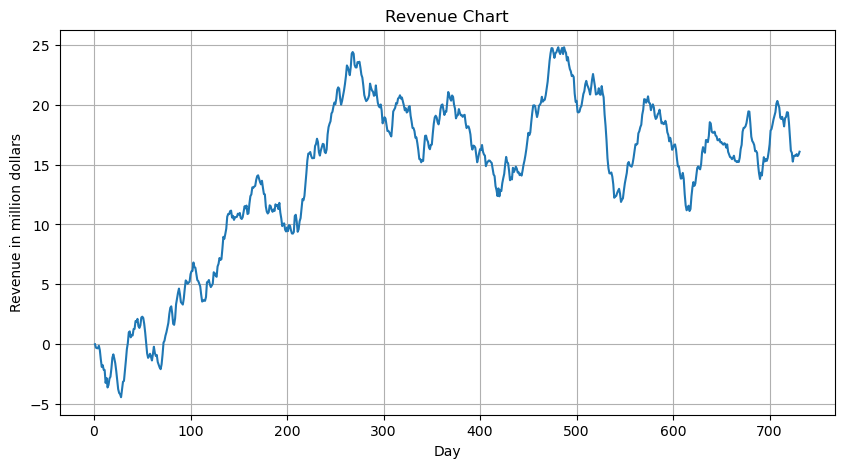

In [12]:
# Line chart to graph

plt.figure(figsize=(10,5))
plt.plot(df.Revenue)
plt.title('Revenue Chart')
plt.xlabel('Day')
plt.ylabel('Revenue in million dollars')
plt.grid(True)
plt.show()

In [13]:
display(df.isnull().any())

Revenue    False
dtype: bool

**2. Describe the time step formatting of the realization, including any gaps in measurement and the length of the sequence.**

In this analysis, we are using the datetime format. 

The frequency is daily and the total length is 731 days (2 years). There is no gaps in the measurment since each day represents a unique day for 731 consecutive days and there are no nulls in the data as checked above.

**3. Evaluate the stationarity of the time series.**

We will be using the ADFuler test to evaluate whether the time series is stationary. Please see the following:

In [14]:
result = adfuller(df['Revenue'])
print("Test statistics :", result[0])
print("p-value: ", result[1])
print("Critical values: ", result[4])

Test statistics : -2.218319047608944
p-value:  0.1996640061506439
Critical values:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}


In [15]:
if result[1]<=0.05:
    print("Reject null hypothesis, the time series is stationary.")
else:
    print("Fail to reject null hypothesis, the time series is non-stationary. The p-value is above 0.05.")

Fail to reject null hypothesis, the time series is non-stationary. The p-value is above 0.05.


The ADFuler test has shown that our data is not stationary since we have a p-value that is above 0.05 (the value was 0.2). We will apply differencing to the time series data to make the data stationary.

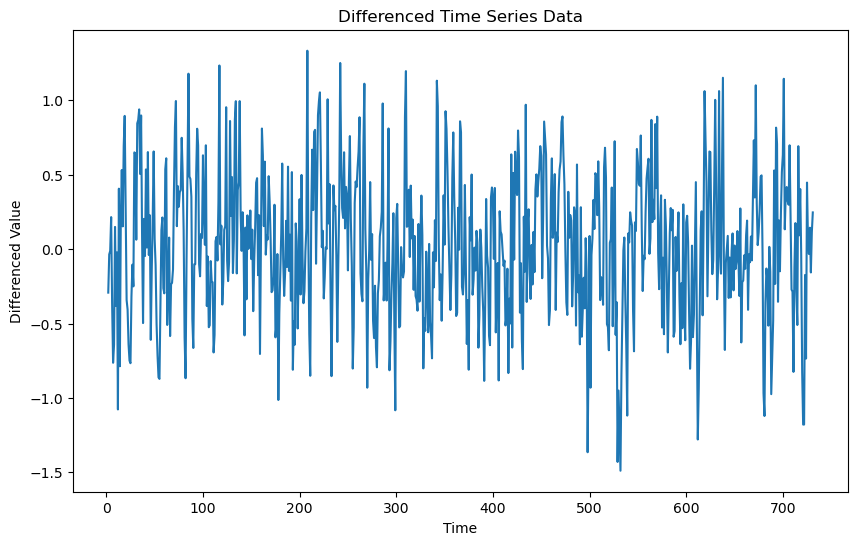

In [16]:
# Apply differencing
# The parameter 'periods' indicates the lag, the default is 1 for first-order differencing
df_stationary = df.diff(periods=1).dropna()

# Plot the differenced time series data
plt.figure(figsize=(10, 6))
plt.plot(df_stationary)
plt.title('Differenced Time Series Data')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.show()

In [17]:
# let's test to see if the data is stationary
result = adfuller(df_stationary['Revenue'])
print("Test statistics :", result[0])
print("p-value: ", result[1])
print("Critical values: ", result[4])

Test statistics : -17.37477230355706
p-value:  5.1132069788403175e-30
Critical values:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}


In [18]:
if result[1]<=0.05:
    print("Reject null hypothesis, the time series is stationary.")
else:
    print("Fail to reject null hypothesis, the time series is non-stationary. The p-value is above 0.05.")

Reject null hypothesis, the time series is stationary.


The data is now stationary by applying differencing.

**4. Explain the steps you used to prepare the data for analysis, including the training and test set split.**

The data preparation steps taken for this analysis were the following:

* Import pandas, numpy, and statsmodels libraries
* Load the medical_time_series.csv file using pd.read_csv()
* Set a datetime index using pandas date_range with the frequency set at daily, date range beginning from from '2020-1-1' for 731 days (2 years)
* Take the time series and transform to make data stationarity by taking the first difference of the 'revenue' as df_stationary
* Split the data into train and test sets, splitting the data 80% to train and 20% to test (see section D1)

**5. Provide a copy of the cleaned data set.**

Attached with performance assessment is the cleaned dataset.

In [19]:
df_stationary.to_csv('prepared_dataset_task1.csv')

### Part IV: Model Identification and Analysis

**D. Analyze the time series data set by doing the following:**

**1. Report the annotated findings with visualizations of your data analysis, including the following elements:**

* **the presence or lack of a seasonal component**
* **trends**
* **the autocorrelation function**
* **the spectral density**
* **the decomposed time series**
* **confirmation of the lack of trends in the residuals of the decomposed series**

Please see the following visualizations:

### Seasonality and Trend:

In [20]:
# seasonality

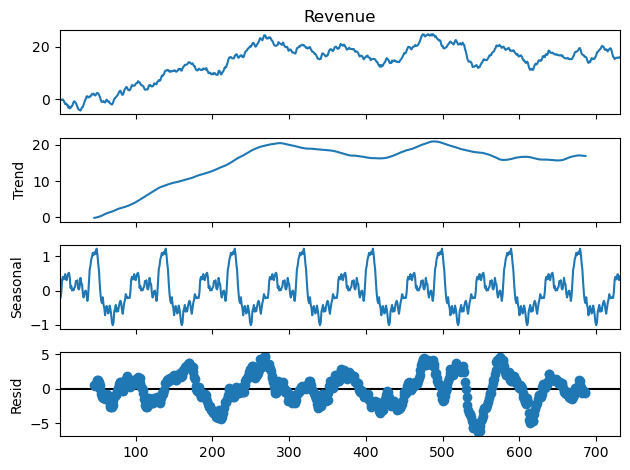

<Axes: title={'center': 'Trend'}, xlabel='Day'>

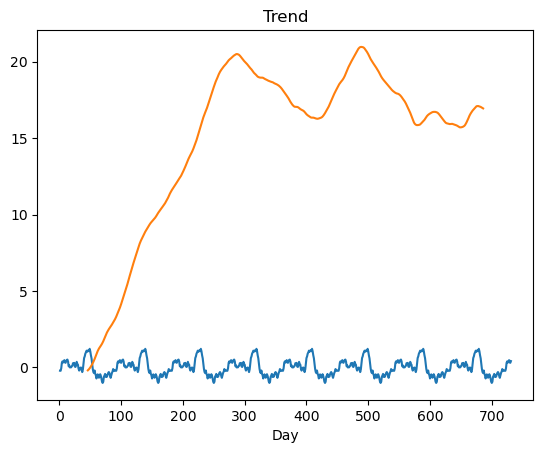

In [21]:
decomp = seasonal_decompose(df['Revenue'], period=90 )
decomp.plot() # Plot decomposition 
plt.show() # Check  for seasonality in the data

#seasonality
plt.title('Seasonality')
decomp.seasonal.plot()

#trend
plt.title('Trend')
decomp.trend.plot()

### Auto Correlation

<Figure size 1200x600 with 0 Axes>

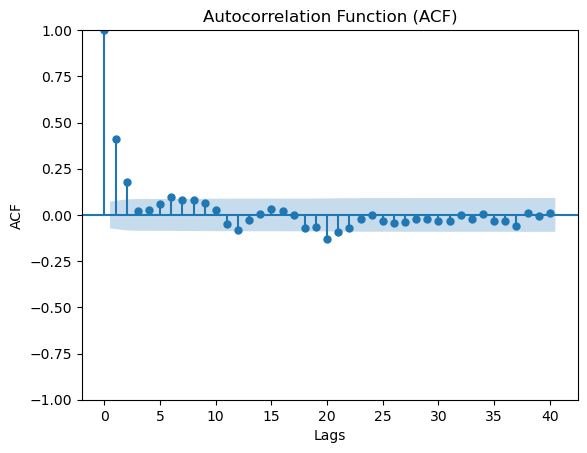

<Figure size 1200x600 with 0 Axes>

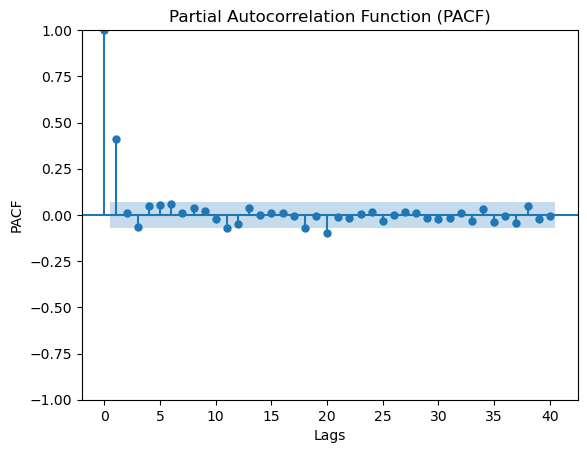

In [22]:
# auto correlation
# ACF and PACF to check for autocorrelation 

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df_stationary, lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df_stationary, lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')

plt.show()

Interpretation of ACF:

* If the ACF value is close to 1 or -1 at a specific lag, it suggests a strong positive or negative correlation with that lag.
* If the ACF value is close to 0, it indicates little or no correlation with that lag.
* The first lag (lag 1) is often high because any time series is highly correlated with itself at the previous time point (t-1).
* Significant spikes in the ACF plot at certain lags may indicate potential seasonality or autoregressive patterns in the data

Interpretation of PACF:

* Significant spikes in the PACF plot at certain lags suggest that the time series is directly influenced by those lags and that they are likely candidates for inclusion in an autoregressive (AR) model. Each spike represents the direct influence of a lag on the current observation.
* Lags with insignificant or close-to-zero PACF values indicate that the influence of those lags is mostly captured by the intermediate lags.

### Spectral Density

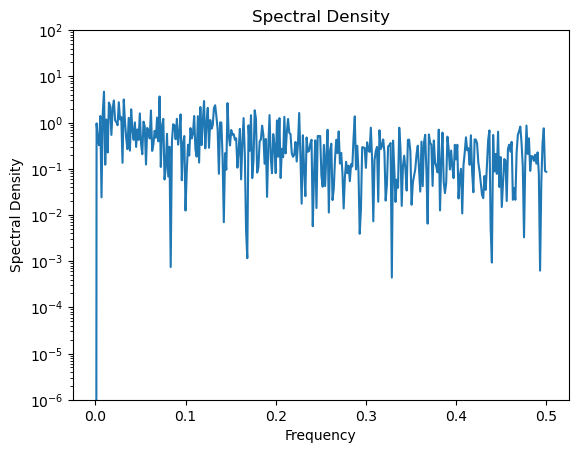

In [23]:
# Spectral density

f, Pxx_den = signal.periodogram(df_stationary['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim([1e-6, 1e2])
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()


In [24]:
df = df_stationary
df

,Revenue
Day,
2,-0.292356
3,-0.035416
4,-0.012215
5,0.215100
6,-0.366702
...,...
727,-0.032693
728,0.143766
729,-0.156834


### Decompose Time Series

In [25]:
#decompose time series

decomposition = sm.tsa.seasonal_decompose(X, model='additive')

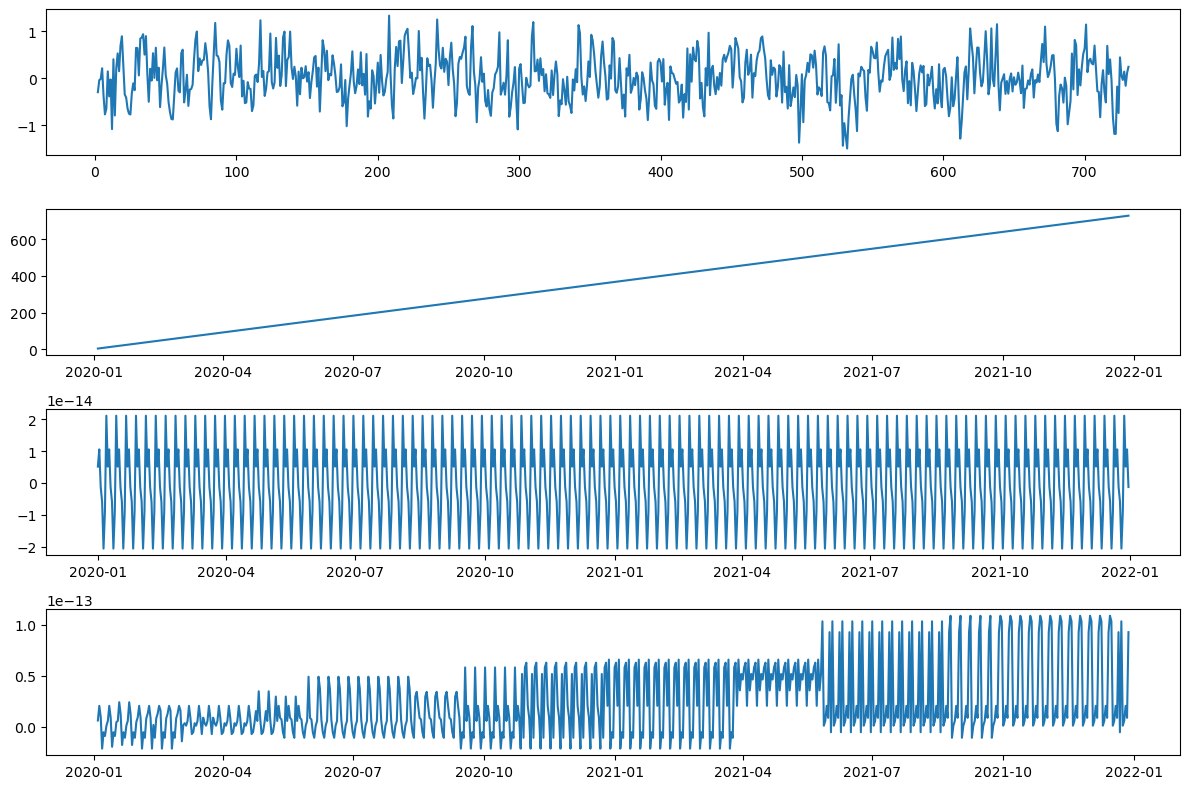

13

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')


plt.tight_layout()
plt.show()
13

In [27]:
# train and test 80/20 split
train = df['Revenue'].dropna().iloc[:int(df.__len__() * 0.8)] # train is 80% of the df
test = df['Revenue'].dropna().iloc[int(df.__len__() *0.8):] # test is 20% of the df

**2. Identify an autoregressive integrated moving average (ARIMA) model that accounts for the observed trend and seasonality of the time series data.**

We will be using the auto_arima() function from the pmdarima package. We will be identifying that the data is seasonal and that the period is 24 months.

In [28]:
# we will be using the auto_arima function 

from pmdarima import auto_arima

# Fit an automatic ARIMA model
model_1 = auto_arima(df, seasonal=True, m=24)  # Set 'seasonal' and 'm' if there is seasonality

# Print the best model summary
print(model_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -437.991
Date:                Mon, 09 Oct 2023   AIC                            879.982
Time:                        18:49:55   BIC                            889.168
Sample:                             0   HQIC                           883.526
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.034     12.258      0.000       0.348       0.480
sigma2         0.1943      0.011     17.842      0.000       0.173       0.216
Ljung-Box (L1) (Q):                   0.02   Jarque-

The Auto ARIMA suggests that the optimal values for the parameters (p,d,q) are (1, 0, 0). We will be using these parameters in our ARIMA model. The above also shows that there is no seasonality in the dataset (as seen in D1).

In [29]:
model = ARIMA(train, order=(1, 0, 0)) # use optimal parameters for the AMIRA model
res = model.fit()
res.summary()

C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -350.349
Date:                Mon, 09 Oct 2023   AIC                            706.698
Time:                        18:49:55   BIC                            719.808
Sample:                             0   HQIC                           711.808
                                - 584                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0328      0.031      1.063      0.288      -0.028       0.093
ar.L1          0.4079      0.038     10.748      0.000       0.333       0.482
sigma2         0.1943      0.012     15.948      0.000       0.170       0.218
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.80
Prob(Q):                              0.75   Prob(JB):                         0.41
Heteroskedasticity (H):               1.04   Skew:                            -0.05
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**3. Perform a forecast using the derived ARIMA model identified in part D2.**

C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


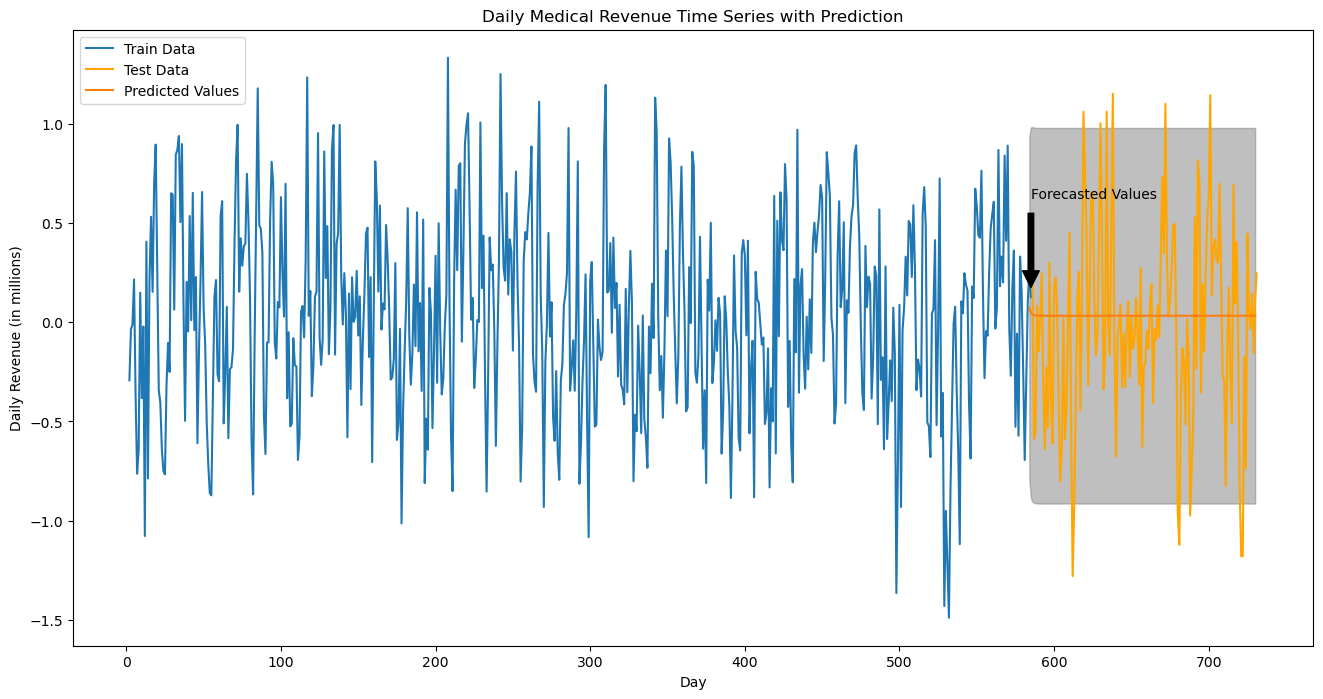

In [30]:
# Generate predictions with test and training data
from statsmodels.graphics.tsaplots import plot_predict

# use arima_forecast_plot for the prediction
def arima_forecast_plot(model, train, test, title, ylabel, xlabel, start=len(train), end=len(train)+len(test), figsize=(16, 8)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    #plot data and predictions, predictions to be in orange
    train.plot(ax=ax)
    test.plot(ax=ax, color='orange')
    plot_predict(model, start=start, end=end, ax=ax, alpha=0.05)
    #annotations and labels
    ax.annotate('Forecasted Values', xy=(train.index[-1], train.iloc[-1]), xytext=(train.index[-1], train.iloc[-1] + 0.5), arrowprops=dict(facecolor='black', shrink=0.1))
    ax.legend(['Train Data', 'Test Data', 'Predicted Values'])
    plt.show()
    
arima_forecast_plot(res, train, test, title='Daily Medical Revenue Time Series with Prediction', ylabel='Daily Revenue (in millions)', xlabel='Day')


In [31]:
# Show predicted values
res.predict(start=len(train), end=len(train)+len(test))

C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


584    0.071071
585    0.048405
586    0.039159
587    0.035388
588    0.033850
         ...   
726    0.032791
727    0.032791
728    0.032791
729    0.032791
730    0.032791
Name: predicted_mean, Length: 147, dtype: float64

In [32]:
# Show up to nearesr dollar
print(round(res.predict(start=len(train), end=len(train)+len(test))*1000000))

584    71071.0
585    48405.0
586    39159.0
587    35388.0
588    33850.0
        ...   
726    32791.0
727    32791.0
728    32791.0
729    32791.0
730    32791.0
Name: predicted_mean, Length: 147, dtype: float64


C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [33]:
# Show mean of predicted values
pred_mean = res.predict(start=len(train), end=len(train)+len(test)).mean()
print(f'The mean of the predicted values is ${pred_mean * 1000000:,.0f}')

# Show the RMSE of the model
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(test, res.predict(start=len(train), end=len(train)+len(test)-1))))

The mean of the predicted values is $33,231
RMSE: 0.48872356070829687


C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### 4. Provide the output and calculations of the analysis you performed.

Please see the above for the outputs and calucations of the AMIRA analysis.

### 5. Provide the code used to support the implementation of the time series model.

Please see the above for the code to implement the time series model and the AMIRA analysis.


### Part V: Data Summary and Implications

**E. Summarize your findings and assumptions by doing the following:**

**1. Discuss the results of your data analysis, including the following points:**

* **the selection of an ARIMA model**
* **the prediction interval of the forecast**
* **a justification of the forecast length**
* **the model evaluation procedure and error metric**

In the above analysis, we have concluded the following: 

* **The selection of the ARIMA model:** We have conducted an ARIMA model for this analysis. The medical data set was determined to be stationary after some analysis and cleaning. Additionally, the auto ARIMA feature revealed that that ARIMA (1, 0, 0) was the optimal fit for the data that we used later in the analysis.

* **The prediction interval of the forecast:** The prediction length of the data set is 20% of the size of the total data or 146 days (731 * 20%). This interval was chosen to provide a sufficient sample size for analyzing the model's accuracy.

* **Justification of the forecast length:** The prediction length of the data set is 20% of the size of the total data or 146 days (731 * 20%). The length provides enough data for validation and giving enough data to show where the patterns we have identified are more likely to show.

* **The model evaluation procedure and error metric:** The ARIMA model used in this analysis was validated by using Root Mean Squared Error (RMSE). An RMSE of 0.49 shows that the model has fitted the data with the predictions being off by about 0.49 on average.



**2. Provide an annotated visualization of the forecast of the final model compared to the test set.**



C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shabn\anaconda31\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


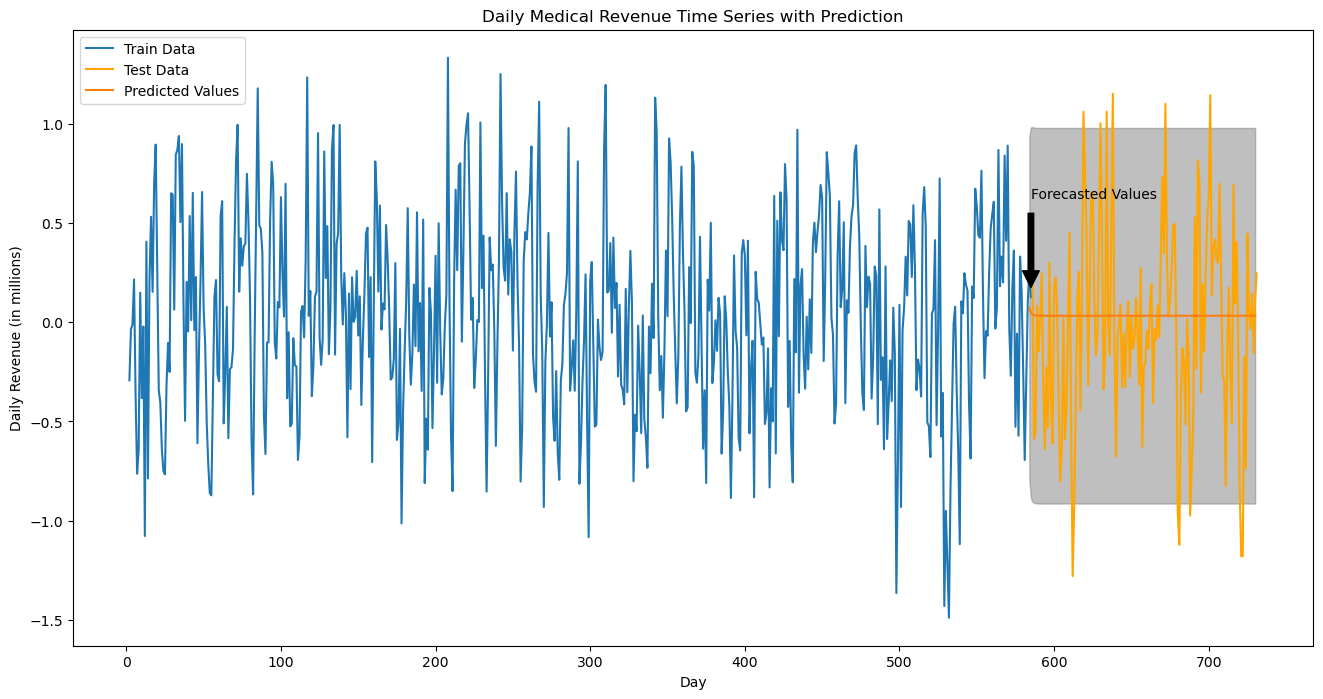

In [34]:
# Show annotated plot of the predicted values
arima_forecast_plot(res, train, test, title='Daily Medical Revenue Time Series with Prediction', ylabel='Daily Revenue (in millions)', xlabel='Day')

**3. Recommend a course of action based on your results.**

To reiterate, our research question was: With two years of hospital revenue data, are we able to create a predictive model to forecast revenue values? 

In this analysis, we were able to successfully work through the data to determine if there are any seasonality, trends, and patterns in the data. Additionally, we were able to create an ARIMA model predicting 146 days of revenue with a RMSE of 0.49 which is reasonably accurate. Considering the informative nature of this analysis, once recommended course of action is to intergrate this analysis into the hospital's procedures for revenue prediction and business forecasting.

While the ARIMA model in this analysis has provided insightful information into the hospital's revenue, it is important to note that prediction models preform the best when the data and information that it is using is the most accurate. Therefore, I would recommend the hospital to periodically perform this analysis with the most up to date information and data.
 

### Part VI: Reporting

**F. With the information from part E, create your report using an industry-relevant interactive development environment (e.g., an R Markdown document, a Jupyter Notebook). Include a PDF or HTML document of your executed notebook presentation.**


### Citations:

Time Series Analysis. Statistic Solutions (2021, September 16). https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/time-series-analysis/